In [11]:
import pandas as pd
import numpy as np

%run ../../../UtilityPython.ipynb

#Aggiungere nell'analisi da quanti apparati si parte (quando si leggono i csv) e a quanti apparati arriviamo

In [6]:
from os import listdir

filepaths = [f for f in listdir("../Datasets/input/20_01/") if f.endswith('.csv')]
print(filepaths)
filepaths=list(map(lambda x : '../Datasets/input/20_01/' + x,filepaths))
print(filepaths)

df = pd.concat(map(lambda x : pd.read_csv(x, sep='~', keep_default_na=False, na_values=['_'], error_bad_lines=False), filepaths))
df=df[df['FLAG MISURA MANCANTE']!='Y']

['202001_Report_settimanale_DSLAM-OLT_30_12_2019_05_01_2020.csv', '202002_Report_settimanale_DSLAM-OLT_06_01_2020_12_01_2020.csv', '202003_Report_settimanale_DSLAM-OLT_13_01_2020_19_01_2020.csv', '202004_Report_settimanale_DSLAM-OLT_20_01_2020_26_01_2020.csv', '202005_Report_settimanale_DSLAM-OLT_27_01_2020_02_02_2020.csv']
['../Datasets/input/20_01/202001_Report_settimanale_DSLAM-OLT_30_12_2019_05_01_2020.csv', '../Datasets/input/20_01/202002_Report_settimanale_DSLAM-OLT_06_01_2020_12_01_2020.csv', '../Datasets/input/20_01/202003_Report_settimanale_DSLAM-OLT_13_01_2020_19_01_2020.csv', '../Datasets/input/20_01/202004_Report_settimanale_DSLAM-OLT_20_01_2020_26_01_2020.csv', '../Datasets/input/20_01/202005_Report_settimanale_DSLAM-OLT_27_01_2020_02_02_2020.csv']


In [7]:
df['LINEE RES'].to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133503 entries, 0 to 39766
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   LINEE RES  133503 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [8]:
#i 3 campi sono univoci per la settimana
df.groupby(['APPARATO','CATEGORIA','ID_MISURE_ATTESTAZIONE','WEEK']).size().to_frame('size').sort_values(['size'], ascending=[False])

size
APPARATO     CATEGORIA   ID_MISURE_ATTESTAZIONE WEEK         
ABBIITAA-001 DIRETTI_ATM MGX92010/10.12         2020-03     1
PONTITAK-100 DIRETTI_IP  RGAPI002/0/7/1/7       2020-05     1
                                                2020-03     1
                                                2020-02     1
                                                2020-01     1
...                                                       ...
FOGGITAE-100 DIRETTI_IP  RGAFG005/102/0/0/16    2020-05     1
                                                2020-04     1
                                                2020-03     1
                                                2020-02     1
ZOGNITAN-101 FIGLI_IP    0                      2020-05     1

[133503 rows x 1 columns]

In [9]:
df_new1 = df.filter(regex='MAX DS ')
df_new2 = df.filter(regex='TIPO GIORNO DS ')
df_anag = df[['APPARATO', 'CATEGORIA','ID_MISURE_ATTESTAZIONE', 'PROVINCIA', 'CAPACITA', 'SOGLIA GIALLA', 'SOGLIA ROSSA', 'LINEE RES', 'LINEE BUS', 'LINEE WHO']]
#df_new = pd.concat(df_example.filter(regex='MAX US '),df_example.filter(regex='TIPO GIORNO US '))
result = pd.concat([df_anag, df_new1, df_new2], axis=1, sort=False)
print("shape of beginner dataset :"+str(df.shape))
tmp = df.groupby(['APPARATO','CATEGORIA', 'ID_MISURE_ATTESTAZIONE','PROVINCIA']).size()
print("Number App of beginner dataset: " + str(tmp.shape[0]))
print("shape of result dataset :"+str(result.shape))
tmp1 = result.groupby(['APPARATO','CATEGORIA', 'ID_MISURE_ATTESTAZIONE','PROVINCIA']).size()
print("Number App of result dataset: " + str(tmp1.shape[0]))
result.head()

shape of beginner dataset :(133503, 282)
Number App of beginner dataset: 29311
shape of result dataset :(133503, 115)
Number App of result dataset: 29311


,APPARATO,CATEGORIA,ID_MISURE_ATTESTAZIONE,PROVINCIA,CAPACITA,SOGLIA GIALLA,SOGLIA ROSSA,LINEE RES,LINEE BUS,LINEE WHO,...,TIPO GIORNO DS 24_01_2020,TIPO GIORNO DS 25_01_2020,TIPO GIORNO DS 26_01_2020,TIPO GIORNO DS 27_01_2020,TIPO GIORNO DS 28_01_2020,TIPO GIORNO DS 29_01_2020,TIPO GIORNO DS 30_01_2020,TIPO GIORNO DS 31_01_2020,TIPO GIORNO DS 01_02_2020,TIPO GIORNO DS 02_02_2020
0,NAPOITAY-200,KIT_VULA,KV-NA008/0/0/2,NA,10000,8000,9000,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRCEITAH-100,DIRETTI_IP,RGJRO002/11/2/1,RO,380,304,342,250,11,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BENEITAF-200,KIT_VULA,KV-BN005/0/0/2,BN,10000,8000,9000,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ORBEITBB-100,DIRETTI_IP,RGAGR002/0/7/1/9,GR,150,120,135,60,18,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MLAZITAC-200,KIT_VULA,KV-ME012/0/0/2,ME,10000,8000,9000,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
missing_data_count(result)

                            Total   Percent
TIPO GIORNO DS 08_01_2020  107448  0.804836
MAX DS 12_01_2020          107448  0.804836
TIPO GIORNO DS 07_01_2020  107448  0.804836
TIPO GIORNO DS 09_01_2020  107448  0.804836
TIPO GIORNO DS 10_01_2020  107448  0.804836
...                           ...       ...
CAPACITA                        0  0.000000
PROVINCIA                       0  0.000000
ID_MISURE_ATTESTAZIONE          0  0.000000
CATEGORIA                       0  0.000000
APPARATO                        0  0.000000

[115 rows x 2 columns]


In [13]:
#Eliminiamo i dati di cui non abbiamo anagrafica (provincia o linee null) se presenti
result['LINEE RES'] = pd.to_numeric(result['LINEE RES'])
result['LINEE BUS'] = pd.to_numeric(result['LINEE BUS'])
result['LINEE WHO'] = pd.to_numeric(result['LINEE WHO'])
result.dropna(subset = ['LINEE RES', 'LINEE BUS', 'LINEE WHO', 'PROVINCIA'],inplace=True)
missing_data_count(result)
print("shape of result dataset :"+str(result.shape))
tmp = result.groupby(['APPARATO','CATEGORIA', 'ID_MISURE_ATTESTAZIONE','PROVINCIA']).size()
print("Number App of result dataset: " + str(tmp.shape[0]))

                           Total  Percent
TIPO GIORNO DS 08_01_2020  82919   0.8055
MAX DS 12_01_2020          82919   0.8055
TIPO GIORNO DS 07_01_2020  82919   0.8055
TIPO GIORNO DS 09_01_2020  82919   0.8055
TIPO GIORNO DS 10_01_2020  82919   0.8055
...                          ...      ...
CAPACITA                       0   0.0000
PROVINCIA                      0   0.0000
ID_MISURE_ATTESTAZIONE         0   0.0000
CATEGORIA                      0   0.0000
APPARATO                       0   0.0000

[115 rows x 2 columns]
shape of result dataset :(102941, 115)
Number App of result dataset: 22910


In [14]:
#Calcolo le percentuali per ottenere ogni apparato quante tipologie di linee possiede
result['LINEE RES PERC']=result['LINEE RES']/(result['LINEE RES']+result['LINEE BUS']+result['LINEE WHO'])
result['LINEE BUS PERC']=result['LINEE BUS']/(result['LINEE RES']+result['LINEE BUS']+result['LINEE WHO'])
result['LINEE WHO PERC']=result['LINEE WHO']/(result['LINEE RES']+result['LINEE BUS']+result['LINEE WHO'])
result.drop(['LINEE RES', 'LINEE BUS', 'LINEE WHO'],axis=1,inplace=True)
result[['LINEE RES PERC','LINEE BUS PERC','LINEE WHO PERC']].head()

,LINEE RES PERC,LINEE BUS PERC,LINEE WHO PERC
1,0.776398,0.034161,0.189441
3,0.731707,0.219512,0.048780
6,0.905660,0.066038,0.028302
7,0.909091,0.090909,0.000000
11,0.778523,0.060403,0.161074


In [15]:
print("shape of result dataset before filter:"+str(result.shape))
tmp = result.groupby(['APPARATO','CATEGORIA', 'ID_MISURE_ATTESTAZIONE','PROVINCIA']).size()
print("Number App before filter: " + str(tmp.shape[0]))
result_f=result[result['LINEE RES PERC']>=0.75]
print("shape of result dataset after filter:"+str(result_f.shape))
tmp1 = result_f.groupby(['APPARATO','CATEGORIA', 'ID_MISURE_ATTESTAZIONE','PROVINCIA']).size()
print("Number App after filter: " + str(tmp1.shape[0]))
result_f.drop(['LINEE RES PERC', 'LINEE BUS PERC', 'LINEE WHO PERC'],axis=1,inplace=True)

shape of result dataset before filter:(102941, 115)
Number App before filter: 22910
shape of result dataset after filter:(29339, 115)
Number App after filter: 6478


C:\Users\ant.pagano\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
result_f['ID']=result_f['APPARATO']+result_f['CATEGORIA']+result_f['ID_MISURE_ATTESTAZIONE']
result_f.drop(['APPARATO', 'CATEGORIA', 'ID_MISURE_ATTESTAZIONE'],axis=1,inplace=True)
result_f.head()

C:\Users\ant.pagano\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PROVINCIA,CAPACITA,SOGLIA GIALLA,SOGLIA ROSSA,MAX DS 30_12_2019,INTERVALLO MAX DS 30_12_2019,MAX DS 31_12_2019,INTERVALLO MAX DS 31_12_2019,MAX DS 01_01_2020,INTERVALLO MAX DS 01_01_2020,...,TIPO GIORNO DS 25_01_2020,TIPO GIORNO DS 26_01_2020,TIPO GIORNO DS 27_01_2020,TIPO GIORNO DS 28_01_2020,TIPO GIORNO DS 29_01_2020,TIPO GIORNO DS 30_01_2020,TIPO GIORNO DS 31_01_2020,TIPO GIORNO DS 01_02_2020,TIPO GIORNO DS 02_02_2020,ID
1,RO,380,304,342,"150,6706",21:00,"96,9896",15:30,"159,6556",18:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRCEITAH-100DIRETTI_IPRGJRO002/11/2/1
6,UD,150,120,135,"12,7709",13:45,"14,7943",16:15,"15,6704",23:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COMEITAA-100DIRETTI_IPRGAUD001/102/0/0/29
7,MI,1000,800,900,"30,038",18:00,0,0,"20,9663",18:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONZITBK-100DIRETTI_IPMD21MZ02/0/4
11,CS,300,240,270,"122,9147",20:30,"81,709",17:15,"129,9643",21:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COSEITAD-100DIRETTI_IPRGACS001/0/0/1/5
12,VI,150,120,135,"47,5336",22:00,"38,736",14:45,"49,6097",15:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CSTAITAD-100DIRETTI_IPRGJVI001/9/2/0


In [17]:
cols = ['ID']  + [col for col in result_f if col != 'ID']
result_f = result_f[cols]
result_f.head()

,ID,PROVINCIA,CAPACITA,SOGLIA GIALLA,SOGLIA ROSSA,MAX DS 30_12_2019,INTERVALLO MAX DS 30_12_2019,MAX DS 31_12_2019,INTERVALLO MAX DS 31_12_2019,MAX DS 01_01_2020,...,TIPO GIORNO DS 24_01_2020,TIPO GIORNO DS 25_01_2020,TIPO GIORNO DS 26_01_2020,TIPO GIORNO DS 27_01_2020,TIPO GIORNO DS 28_01_2020,TIPO GIORNO DS 29_01_2020,TIPO GIORNO DS 30_01_2020,TIPO GIORNO DS 31_01_2020,TIPO GIORNO DS 01_02_2020,TIPO GIORNO DS 02_02_2020
1,TRCEITAH-100DIRETTI_IPRGJRO002/11/2/1,RO,380,304,342,"150,6706",21:00,"96,9896",15:30,"159,6556",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,COMEITAA-100DIRETTI_IPRGAUD001/102/0/0/29,UD,150,120,135,"12,7709",13:45,"14,7943",16:15,"15,6704",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MONZITBK-100DIRETTI_IPMD21MZ02/0/4,MI,1000,800,900,"30,038",18:00,0,0,"20,9663",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,COSEITAD-100DIRETTI_IPRGACS001/0/0/1/5,CS,300,240,270,"122,9147",20:30,"81,709",17:15,"129,9643",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,CSTAITAD-100DIRETTI_IPRGJVI001/9/2/0,VI,150,120,135,"47,5336",22:00,"38,736",14:45,"49,6097",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
tmp=result_f.groupby(['ID','PROVINCIA']).size().to_frame('number_of_week').sort_values(['number_of_week'], ascending=[False])

In [19]:
print('Apparati con 5 settimane : ' + str(tmp[tmp['number_of_week']==5].count()))
print('Apparati con 4 settimane : ' + str(tmp[tmp['number_of_week']==4].count()))
print('Apparati con 3 settimane : ' + str(tmp[tmp['number_of_week']==3].count()))
print('Apparati con 2 settimane : ' + str(tmp[tmp['number_of_week']==2].count()))
print('Apparati con 1 settimana : ' + str(tmp[tmp['number_of_week']==1].count()))

Apparati con 5 settimane : number_of_week    5375
dtype: int64
Apparati con 4 settimane : number_of_week    241
dtype: int64
Apparati con 3 settimane : number_of_week    202
dtype: int64
Apparati con 2 settimane : number_of_week    234
dtype: int64
Apparati con 1 settimana : number_of_week    426
dtype: int64


In [20]:
join=pd.merge(result_f, tmp, on='ID', how='outer')
num_of_weeks = tmp.number_of_week.max()
result_f=join[join.number_of_week==num_of_weeks]
result_f.drop(['number_of_week'],axis=1,inplace=True)
tmp1 = result_f.groupby(['ID','PROVINCIA']).size()
print("Number App after filter: " + str(tmp1.shape[0]))

Number App after filter: 5375


C:\Users\ant.pagano\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
import datetime
from datetime import date, timedelta

def reshape_df(df, start_date, end_date):
    sdate = datetime.datetime.strptime(start_date, '%d_%m_%Y')
    edate = datetime.datetime.strptime(end_date, '%d_%m_%Y')
    
    delta = edate - sdate       # as timedelta
    final = pd.DataFrame(columns = ['ID', 'PROVINCIA','DATA', 'CAPACITA', 'SOGLIA GIALLA', 'SOGLIA ROSSA', 
                                    'MAX_DS', 'INTERVALLO_MAX_DS', 'TIPO_GIORNO_DS'])
    
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        
        tmp = df.filter(regex=datetime.datetime.strftime(day, '%d_%m_%Y')).rename(
            columns={'MAX DS ' + datetime.datetime.strftime(day, '%d_%m_%Y'):'MAX_DS',
                     'INTERVALLO MAX DS ' + datetime.datetime.strftime(day, '%d_%m_%Y'):'INTERVALLO_MAX_DS',
                     'TIPO GIORNO DS '+datetime.datetime.strftime(day, '%d_%m_%Y'):'TIPO_GIORNO_DS'})
        df_anag = df[['ID', 'PROVINCIA', 'CAPACITA', 'SOGLIA GIALLA', 'SOGLIA ROSSA',]]
        tmp1 = pd.concat([df_anag, tmp], axis=1, sort=False)
        tmp1.dropna(inplace=True)
        tmp1['DATA'] = day
        final=final.append(tmp1)
        
    return final

In [22]:
finale=reshape_df(result_f, result_f.columns[5].split(' ')[-1], result_f.columns[-1].split(' ')[-1])
finale['DATA']=finale['DATA'].dt.strftime('%d-%m-%Y')
finale=finale[finale.MAX_DS!='0']
finale.DATA.value_counts().sort_values

<bound method Series.sort_values of 14-01-2020    5358
25-01-2020    5213
06-01-2020    5205
26-01-2020    5199
19-01-2020    5177
18-01-2020    5173
11-01-2020    5172
03-01-2020    5162
02-02-2020    5161
04-01-2020    5151
12-01-2020    5150
30-12-2019    5137
05-01-2020    5136
01-01-2020    5130
02-01-2020    5128
01-02-2020    5120
31-12-2019    5086
29-01-2020    5083
28-01-2020    5070
31-01-2020    5067
24-01-2020    5067
27-01-2020    5053
30-01-2020    5051
15-01-2020    5041
22-01-2020    5035
17-01-2020    5035
23-01-2020    5032
20-01-2020    5023
16-01-2020    5011
21-01-2020    5010
07-01-2020    5001
10-01-2020    5001
09-01-2020    4987
08-01-2020    4975
13-01-2020    4753
Name: DATA, dtype: int64>

In [23]:
finale

,ID,PROVINCIA,DATA,CAPACITA,SOGLIA GIALLA,SOGLIA ROSSA,MAX_DS,INTERVALLO_MAX_DS,TIPO_GIORNO_DS
0,TRCEITAH-100DIRETTI_IPRGJRO002/11/2/1,RO,30-12-2019,380,304,342,"150,6706",21:00,FER
5,COMEITAA-100DIRETTI_IPRGAUD001/102/0/0/29,UD,30-12-2019,150,120,135,"12,7709",13:45,FER
10,MONZITBK-100DIRETTI_IPMD21MZ02/0/4,MI,30-12-2019,1000,800,900,"30,038",18:00,FER
15,COSEITAD-100DIRETTI_IPRGACS001/0/0/1/5,CS,30-12-2019,300,240,270,"122,9147",20:30,FER
20,CSTAITAD-100DIRETTI_IPRGJVI001/9/2/0,VI,30-12-2019,150,120,135,"47,5336",22:00,FER
...,...,...,...,...,...,...,...,...,...
28126,CLTAITAE-103DIRETTI_IPRGACL001/101/0/0/13,CL,02-02-2020,1000,800,900,"70,902",21:15,FES
28131,ALATITAF-101FIGLI_IP0,FR,02-02-2020,1000,800,900,"73,8474",14:00,FES
28136,ROMAITBP-100DIRETTI_IPRGARM018/104/0/0/13,RM,02-02-2020,1000,800,900,"109,3896",23:15,FES
28141,CASEITAB-100DIRETTI_IPRGACE003/103/0/0/29,CE,02-02-2020,450,360,405,"60,8626",22:30,FES


In [24]:
finale['MAX_DS'] = finale['MAX_DS'].str.replace(',', '.').astype(float)
finale['SOGLIA GIALLA'] = finale['SOGLIA GIALLA'].str.replace(',', '.').astype(float)
finale['SOGLIA ROSSA'] = finale['SOGLIA ROSSA'].str.replace(',', '.').astype(float)

In [25]:
finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178153 entries, 0 to 28146
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 178153 non-null  object 
 1   PROVINCIA          178153 non-null  object 
 2   DATA               178153 non-null  object 
 3   CAPACITA           178153 non-null  object 
 4   SOGLIA GIALLA      178153 non-null  float64
 5   SOGLIA ROSSA       178153 non-null  float64
 6   MAX_DS             178153 non-null  float64
 7   INTERVALLO_MAX_DS  178153 non-null  object 
 8   TIPO_GIORNO_DS     178153 non-null  object 
dtypes: float64(3), object(6)
memory usage: 13.6+ MB


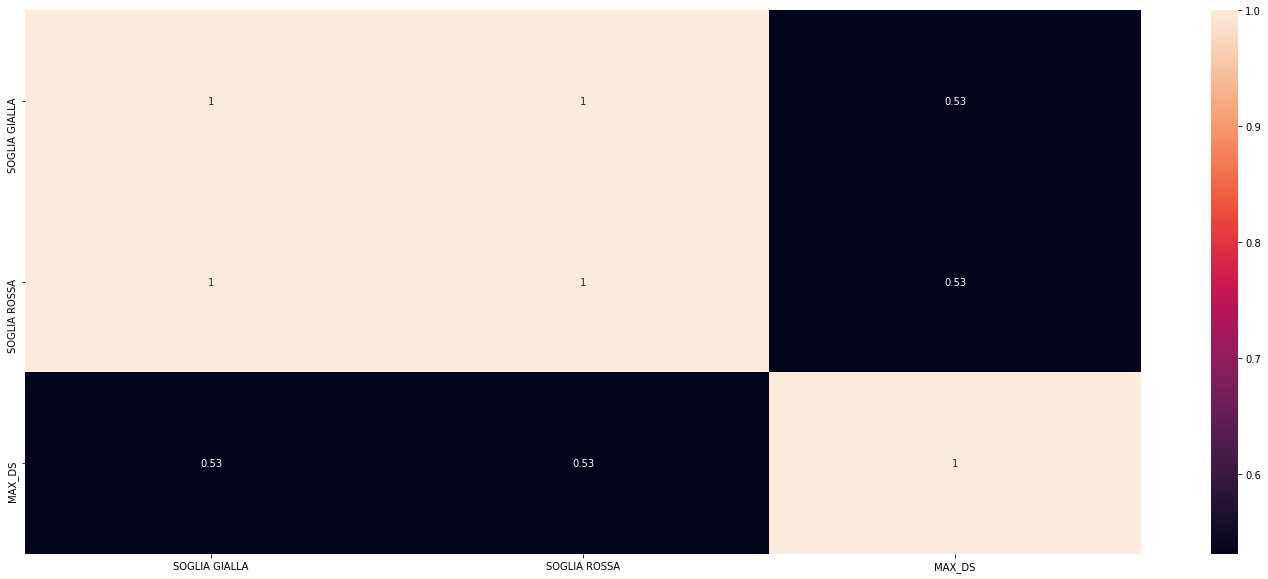

In [26]:
plot_corr_matrix(finale,25,10)

In [27]:
#Su DAZN Roma-Torino alle 20.45 del 05-01-2020
#Vediamo il numero di apparati che hanno avuto il picco in quella fascia oraria, e di questi 
#quanti hanno superato la capacità
#n° di apparati 
df_0=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='05-01-2020')].groupby(
    ['INTERVALLO_MAX_DS']).size().to_frame('N_APPARATI').sort_values(['INTERVALLO_MAX_DS']).tail(20)
#n° di apparati che hanno superato la soglia gialla e rossa
df_1=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='05-01-2020') & 
       (finale['SOGLIA GIALLA']<finale['MAX_DS'])].groupby(['INTERVALLO_MAX_DS']).size().to_frame(
    'N_APPARATI_SOPRA_GIALLA').sort_values(['INTERVALLO_MAX_DS'])
df_2=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='05-01-2020') &
       (finale['SOGLIA ROSSA']<finale['MAX_DS'])].groupby(['INTERVALLO_MAX_DS']).size().to_frame(
    'N_APPARATI_SOPRA_ROSSA').sort_values(['INTERVALLO_MAX_DS'])
join0=pd.merge(df_0, df_1, on='INTERVALLO_MAX_DS', how='outer')
join1=pd.merge(join0, df_2, on='INTERVALLO_MAX_DS', how='outer')
join1=join1.fillna(0)
#DS Complessivo
df_3=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='05-01-2020')].groupby(['INTERVALLO_MAX_DS']).agg(
    {'MAX_DS': ['sum', 'max']}).sort_values(['INTERVALLO_MAX_DS']).tail(20)
join2=pd.merge(join1, df_3, on='INTERVALLO_MAX_DS', how='outer')
join2

C:\Users\ant.pagano\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 2 on the right)



,N_APPARATI,N_APPARATI_SOPRA_GIALLA,N_APPARATI_SOPRA_ROSSA,"(MAX_DS, sum)","(MAX_DS, max)"
INTERVALLO_MAX_DS,,,,,
19:00,2,0.0,0.0,99.6061,76.3535
19:15,5,0.0,0.0,255.2871,108.2246
19:30,1,0.0,0.0,21.0897,21.0897
19:45,3,0.0,0.0,287.2026,251.6485
20:00,1,0.0,0.0,36.9981,36.9981
20:15,1,0.0,0.0,67.8947,67.8947
20:30,1,0.0,0.0,78.0541,78.0541
20:45,4,0.0,0.0,214.4251,76.7217
21:00,16,0.0,0.0,1709.1440,210.2668


In [28]:
#Su Sky ROMA-Juve alle 20.45 del 12-01-2020
df_0=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='12-01-2020')].groupby(
    ['INTERVALLO_MAX_DS']).size().to_frame('N_APPARATI').sort_values(['INTERVALLO_MAX_DS']).tail(20)
#n° di apparati che hanno superato la soglia gialla e rossa
df_1=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='12-01-2020') & 
       (finale['SOGLIA GIALLA']<finale['MAX_DS'])].groupby(['INTERVALLO_MAX_DS']).size().to_frame(
    'N_APPARATI_SOPRA_GIALLA').sort_values(['INTERVALLO_MAX_DS'])
df_2=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='12-01-2020') &
       (finale['SOGLIA ROSSA']<finale['MAX_DS'])].groupby(['INTERVALLO_MAX_DS']).size().to_frame(
    'N_APPARATI_SOPRA_ROSSA').sort_values(['INTERVALLO_MAX_DS'])
join0=pd.merge(df_0, df_1, on='INTERVALLO_MAX_DS', how='outer')
join1=pd.merge(join0, df_2, on='INTERVALLO_MAX_DS', how='outer')
join1=join1.fillna(0)
#DS Complessivo
df_3=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='12-01-2020')].groupby(['INTERVALLO_MAX_DS']).agg(
    {'MAX_DS': ['sum', 'max']}).sort_values(['INTERVALLO_MAX_DS']).tail(20)
join2=pd.merge(join1, df_3, on='INTERVALLO_MAX_DS', how='outer')
join2

C:\Users\ant.pagano\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 2 on the right)



,N_APPARATI,N_APPARATI_SOPRA_GIALLA,N_APPARATI_SOPRA_ROSSA,"(MAX_DS, sum)","(MAX_DS, max)"
INTERVALLO_MAX_DS,,,,,
18:45,11,0.0,0.0,1648.4124,284.2888
19:00,8,0.0,0.0,663.3449,171.6299
19:15,7,0.0,0.0,446.3717,143.8608
19:30,4,0.0,0.0,417.6977,166.8413
19:45,5,0.0,0.0,497.7537,177.5317
20:00,6,0.0,0.0,256.7323,103.0434
20:15,2,0.0,0.0,102.3056,79.1016
20:30,3,0.0,0.0,334.7050,177.4630
20:45,5,0.0,0.0,221.8261,62.3966


In [29]:
#Su DAZN Sabato 11 gennaio 2020, ore 20.45, INTER-ATALANTA
df_0=finale[(finale['PROVINCIA']=='BG') & (finale['DATA']=='11-01-2020')].groupby(
    ['INTERVALLO_MAX_DS']).size().to_frame('N_APPARATI').sort_values(['INTERVALLO_MAX_DS']).tail(20)
#n° di apparati che hanno superato la soglia gialla e rossa
df_1=finale[(finale['PROVINCIA']=='BG') & (finale['DATA']=='11-01-2020') & 
       (finale['SOGLIA GIALLA']<finale['MAX_DS'])].groupby(['INTERVALLO_MAX_DS']).size().to_frame(
    'N_APPARATI_SOPRA_GIALLA').sort_values(['INTERVALLO_MAX_DS'])
df_2=finale[(finale['PROVINCIA']=='BG') & (finale['DATA']=='11-01-2020') &
       (finale['SOGLIA ROSSA']<finale['MAX_DS'])].groupby(['INTERVALLO_MAX_DS']).size().to_frame(
    'N_APPARATI_SOPRA_ROSSA').sort_values(['INTERVALLO_MAX_DS'])
join0=pd.merge(df_0, df_1, on='INTERVALLO_MAX_DS', how='outer')
join1=pd.merge(join0, df_2, on='INTERVALLO_MAX_DS', how='outer')
join1=join1.fillna(0)
#DS Complessivo
df_3=finale[(finale['PROVINCIA']=='BG') & (finale['DATA']=='11-01-2020')].groupby(['INTERVALLO_MAX_DS']).agg(
    {'MAX_DS': ['sum', 'max']}).sort_values(['INTERVALLO_MAX_DS']).tail(20)
join2=pd.merge(join1, df_3, on='INTERVALLO_MAX_DS', how='outer')
join2

C:\Users\ant.pagano\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 2 on the right)



,N_APPARATI,N_APPARATI_SOPRA_GIALLA,N_APPARATI_SOPRA_ROSSA,"(MAX_DS, sum)","(MAX_DS, max)"
INTERVALLO_MAX_DS,,,,,
18:00,3,0.0,0.0,85.6595,50.7939
18:30,2,0.0,0.0,77.1813,48.2277
18:45,1,0.0,0.0,57.6101,57.6101
19:15,1,0.0,0.0,48.9887,48.9887
19:30,1,0.0,0.0,65.3695,65.3695
19:45,1,0.0,0.0,53.7084,53.7084
20:15,3,0.0,0.0,163.8108,74.6839
20:30,2,0.0,0.0,59.2944,32.3827
20:45,8,0.0,0.0,777.6783,229.3367


In [30]:
#Su DAZN Domenica 26 gennaio 2020, ore 15.00, SAMPDORIA-SASSUOLO
#Domenica 26 gennaio 2020, ore 12.30, INTER-CAGLIARI

df_0=finale[(finale['PROVINCIA']=='MI') & (finale['DATA']=='23-01-2020')].groupby(
    ['INTERVALLO_MAX_DS']).size().to_frame('N_APPARATI').sort_values(['INTERVALLO_MAX_DS']).head(20)
#n° di apparati che hanno superato la soglia gialla e rossa
df_1=finale[(finale['PROVINCIA']=='MI') & (finale['DATA']=='23-01-2020') & 
       (finale['SOGLIA GIALLA']<finale['MAX_DS'])].groupby(['INTERVALLO_MAX_DS']).size().to_frame(
    'N_APPARATI_SOPRA_GIALLA').sort_values(['INTERVALLO_MAX_DS'])
df_2=finale[(finale['PROVINCIA']=='MI') & (finale['DATA']=='23-01-2020') &
       (finale['SOGLIA ROSSA']<finale['MAX_DS'])].groupby(['INTERVALLO_MAX_DS']).size().to_frame(
    'N_APPARATI_SOPRA_ROSSA').sort_values(['INTERVALLO_MAX_DS'])
join0=pd.merge(df_0, df_1, on='INTERVALLO_MAX_DS', how='outer')
join1=pd.merge(join0, df_2, on='INTERVALLO_MAX_DS', how='outer')
join1=join1.fillna(0)
#DS Complessivo
df_3=finale[(finale['PROVINCIA']=='MI') & (finale['DATA']=='23-01-2020')].groupby(['INTERVALLO_MAX_DS']).agg(
    {'MAX_DS': ['sum', 'max']}).sort_values(['INTERVALLO_MAX_DS']).head(20)
join2=pd.merge(join1, df_3, on='INTERVALLO_MAX_DS', how='outer')
join2

C:\Users\ant.pagano\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 2 on the right)



,N_APPARATI,N_APPARATI_SOPRA_GIALLA,N_APPARATI_SOPRA_ROSSA,"(MAX_DS, sum)","(MAX_DS, max)"
INTERVALLO_MAX_DS,,,,,
00:00,2,0.0,0.0,685.5021,594.6875
01:45,1,0.0,0.0,44.1840,44.1840
11:15,1,0.0,0.0,15.8747,15.8747
13:15,1,0.0,0.0,851.7895,851.7895
14:45,1,0.0,0.0,24.9044,24.9044
15:00,1,0.0,0.0,26.4795,26.4795
15:30,1,0.0,0.0,138.7920,138.7920
16:15,1,0.0,0.0,495.6374,495.6374
16:45,1,0.0,0.0,417.9734,417.9734


In [31]:
df_0=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='27-12-2019')].groupby(
    ['DATA','INTERVALLO_MAX_DS']).size().to_frame('N_APPARATI').sort_values(['INTERVALLO_MAX_DS']).tail(20)
#n° di apparati che hanno superato la soglia gialla e rossa
df_1=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='27-12-2019') & 
       (finale['SOGLIA GIALLA']<finale['MAX_DS'])].groupby(['DATA','INTERVALLO_MAX_DS']).size().to_frame(
    'N_APPARATI_SOPRA_GIALLA').sort_values(['INTERVALLO_MAX_DS'])
df_2=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='27-12-2019') &
       (finale['SOGLIA ROSSA']<finale['MAX_DS'])].groupby(['DATA','INTERVALLO_MAX_DS']).size().to_frame(
    'N_APPARATI_SOPRA_ROSSA').sort_values(['INTERVALLO_MAX_DS'])
join0=pd.merge(df_0, df_1, on=['DATA','INTERVALLO_MAX_DS'], how='outer')
join1=pd.merge(join0, df_2, on=['DATA','INTERVALLO_MAX_DS'], how='outer')
join1=join1.fillna(0)
#DS Complessivo
df_3=finale[(finale['PROVINCIA']=='RM') & (finale['DATA']=='27-12-2019')].groupby(['DATA','INTERVALLO_MAX_DS']).agg(
    {'MAX_DS': ['sum', 'max']}).sort_values(['INTERVALLO_MAX_DS']).tail(20)
join2=pd.merge(join1, df_3, on=['DATA','INTERVALLO_MAX_DS'], how='outer')
join2

C:\Users\ant.pagano\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 2 on the right)



,,N_APPARATI,N_APPARATI_SOPRA_GIALLA,N_APPARATI_SOPRA_ROSSA,"(MAX_DS, sum)","(MAX_DS, max)"
DATA,INTERVALLO_MAX_DS,,,,,


In [32]:
missing_data_count(finale)

                   Total  Percent
TIPO_GIORNO_DS         0      0.0
INTERVALLO_MAX_DS      0      0.0
MAX_DS                 0      0.0
SOGLIA ROSSA           0      0.0
SOGLIA GIALLA          0      0.0
CAPACITA               0      0.0
DATA                   0      0.0
PROVINCIA              0      0.0
ID                     0      0.0


In [33]:
#finale[finale['MAX_DS'].isnull()].groupby('DATA').size()
finale.groupby('DATA').size().to_frame('size').reset_index().sort_values(
    ['DATA', 'size'], ascending=[True, False])

,DATA,size
0,01-01-2020,5130
1,01-02-2020,5120
2,02-01-2020,5128
3,02-02-2020,5161
4,03-01-2020,5162
5,04-01-2020,5151
6,05-01-2020,5136
7,06-01-2020,5205
8,07-01-2020,5001
9,08-01-2020,4975


In [34]:
finale.to_csv (r'./final_dataset_v2.csv', index = None, header=True)